Maximize nearfield enhancement
======================

In this example, we will search for a gold nano-structure geometry which leads to maximum electric field enhancement at some position (again of course for a specific wavelength and light polarization).


Load the modules
-------------------

In [1]:
from pyGDM2 import structures
from pyGDM2 import materials
from pyGDM2 import fields
from pyGDM2 import core

from pyGDM2.EO.problems import ProblemNearfield
from pyGDM2.EO.models import RectangularAntenna
from pyGDM2.EO.core import run_eo

Setup and run the optimization
-------------------------------

Again, we setup first the pyGDM simulation and then the optimization model/problem/algorithm.
The model will be again the simple rectangular structure, the problem is now the maximization of the nearfield.

Finally we run the optimization.


/home/wiecha/.local/lib/python2.7/site-packages/pyGDM2/structures.py:119: UserWarning: Emtpy structure geometry.
  warnings.warn("Emtpy structure geometry.")
/home/wiecha/.local/lib/python2.7/site-packages/pyGDM2/structures.py:104: UserWarning: Minimum structure Z-value lies below substrate level! Shifting structure bottom to Z=step/2.
  " Shifting structure bottom to Z=step/2.")


Rectangular Antenna optimziation model: Note that this simple model is rather intended for testing and demonstration purposes.

----------------------------------------------
 Starting new optimization
----------------------------------------------


iter #  1, time:    9.4s, progress #  1, f_evals: 80 


/home/wiecha/.local/lib/python2.7/site-packages/pyGDM2/EO/models.py:156: UserWarning: 'models.BaseModel.plot_structure' not re-implemented! Using `pyGDM2.visu.structure`.
  warnings.warn("'models.BaseModel.plot_structure' not re-implemented! Using `pyGDM2.visu.structure`.")


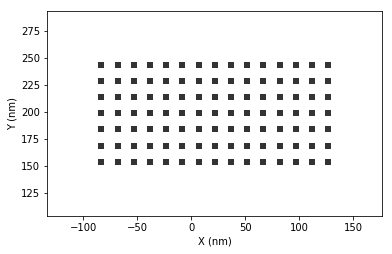

        - champion fitness: [-4.7713]

iter #  2, time:   23.5s, progress #  1, f_evals: 120 (non-success: 1)
iter #  3, time:   40.3s, progress #  1, f_evals: 160 (non-success: 2)
iter #  4, time:   53.9s, progress #  1, f_evals: 200 (non-success: 3)
iter #  5, time:   67.3s, progress #  2, f_evals: 240 
        - champion fitness: [-5.6735]

iter #  6, time:   83.6s, progress #  3, f_evals: 280 
        - champion fitness: [-5.7323]

iter #  7, time:   99.0s, progress #  4, f_evals: 320 
        - champion fitness: [-11.997]

iter #  8, time:  116.1s, progress #  4, f_evals: 360 (non-success: 1)
iter #  9, time:  132.3s, progress #  4, f_evals: 400 (non-success: 2)
iter # 10, time:  149.0s, progress #  5, f_evals: 440 


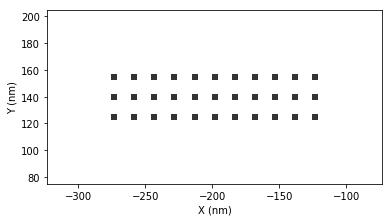

        - champion fitness: [-18.172]

iter # 11, time:  163.4s, progress #  5, f_evals: 480 (non-success: 1)
iter # 12, time:  176.4s, progress #  5, f_evals: 520 (non-success: 2)
iter # 13, time:  194.1s, progress #  5, f_evals: 560 (non-success: 3)
iter # 14, time:  209.5s, progress #  6, f_evals: 600 
        - champion fitness: [-18.512]

iter # 15, time:  220.0s, progress #  6, f_evals: 640 (non-success: 1)
iter # 16, time:  234.5s, progress #  6, f_evals: 680 (non-success: 2)
iter # 17, time:  245.0s, progress #  6, f_evals: 720 (non-success: 3)
iter # 18, time:  255.1s, progress #  7, f_evals: 760 
        - champion fitness: [-24.104]

iter # 19, time:  267.2s, progress #  7, f_evals: 800 (non-success: 1)
iter # 20, time:  276.1s, progress #  7, f_evals: 840 (non-success: 2)
iter # 21, time:  289.2s, progress #  7, f_evals: 880 (non-success: 3)
iter # 22, time:  308.7s, progress #  7, f_evals: 920 (non-success: 4)
iter # 23, time:  324.3s, progress #  7, f_evals: 960 (non-succ

In [2]:
#==============================================================================
# Setup pyGDM simulation
#==============================================================================
## ---------- Setup structure
mesh = 'cube'
step = 15
material = materials.gold()        # material: gold
n1, n2 = 1.0, 1.0         # constant environment

## --- Empty dummy-geometry, will be replaced on run-time by EO trial geometries
geometry = []       
struct = structures.struct(step, geometry, material, n1,n2, structures.get_normalization(mesh))


## ---------- Setup incident field
field_generator = fields.planewave        # planwave excitation
kwargs = dict(theta = [0.0])              # target polarization
wavelengths = [800]                       # target wavelength
efield = fields.efield(field_generator, wavelengths=wavelengths, kwargs=kwargs)


## ---------- Simulation initialization
sim = core.simulation(struct, efield)


#==============================================================================
# setup evolutionary optimization
#==============================================================================
## --- structure model and optimizaiton problem
limits_W   = [2, 20]
limits_L   = [2, 20] 
limits_pos = [-500, 500]
height = 3
model = RectangularAntenna(sim, limits_W, limits_L, limits_pos, height)

target = 'E'
r_probe = [-100, 150, 80]
problem = ProblemNearfield(model, r_probe=r_probe, opt_target=target)



## --- filename to save results 
results_filename = 'eo_NF.eo'

## --- size of population
population = 40          # Nr of individuals

## --- stop criteria
max_time = 400           # seconds
max_iter = 30            # max. iterations
max_nonsuccess = 10      # max. consecutive iterations without improvement

## --- other config
generations = 1          # generations to evolve between status reports
plot_interval = 5        # plot each N improvements
save_all_generations = False

##  Use algorithm "sade" (jDE variant, a self-adaptive form of differential evolution)
import pygmo as pg
algorithm = pg.sade
algorithm_kwargs = dict()   # optional kwargs passed to the algorithm


eo_dict = run_eo(problem,
                 population=population,
                 algorithm=algorithm,
                 plot_interval=plot_interval, 
                 generations=generations, 
                 max_time=max_time, max_iter=max_iter, max_nonsuccess=max_nonsuccess,
                 filename=results_filename)

**Note:** Since we have 4 free parameters (the scattering example had only 2), the convergence is visibly slower in this problem compared to the example maximizing the scattering.

Load and analyze best solution
-----------------------------------

Let's calculate a nearfield map of the scattered field of the optimum structure

In [3]:
## --- load additional modules
from pyGDM2 import linear
from pyGDM2 import tools
from pyGDM2 import visu

from pyGDM2.EO.tools import get_best_candidate
from pyGDM2.EO.tools import get_best_candidate_f_x
from pyGDM2.EO.tools import get_problem

import matplotlib.pyplot as plt


#==============================================================================
# Load best candidate from optimization
#==============================================================================
## --- optimization results file
results_filename = 'eo_NF.eo'

sim = get_best_candidate(results_filename, iteration=-1, verbose=True)
problem = get_problem(results_filename)
f, x, N_improvements = get_best_candidate_f_x(results_filename, iteration=-1)


print '\n =================================================='
print "                    Problem:", problem.get_extra_info()
print " target position: {}".format(problem.r_probe.T[0])
print " optimization: Nr of improvements {}".format(N_improvements)
print " optimization: best fitness {}".format(f)
print '===================================================\n'

Best candidate after 9 iterations with improvement: fitness = ['-25.667']
Testing: recalculating fitness... Done. Everything OK.

                    Problem: 
	Maximization of near-field intensity
 target position: [-100  150   80]
 optimization: Nr of improvements 9
 optimization: best fitness [-25.66747458]



**Note:** We don't even have to setup a new simulation in this case, since we keep all parameters as during in the optimization (remember, when we were analyzing the optimum solution in the scattering example we calculated a whole spectrum which we don't need to do now). 
In this example, we will simply use the `simulation` object, returned by `get_best_candidate`. Since we didn't turn off the fitness-verification, `core.scatter` was already executed within `get_best_candidate`, so all we need to do is to use `linear.nearfield` to get the nearfield distribution on a 2D map outside the structure.

Nearfield map above optimum solution
-----------------------------------------

In [4]:
## --- map 80nm above substrate
MAP = tools.generate_NF_map_XY(-300,300,51, -300,300,51, Z0=80)
Es, Etot, Bs, Btot = linear.nearfield(sim, field_index=0, r_probe=MAP)

Finally, we plot the result (including the structure contour and target position of NF maximization):

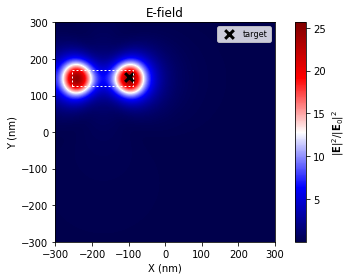

In [5]:
plt.figure()
plt.subplot(aspect='equal')
plt.title("E-field")

im = visu.structure_contour(sim, color='w', dashes=[2,2], show=0, zorder=10)
im = visu.vectorfield_color(Es, show=0, interpolation='bicubic')
plt.colorbar(label=r'$|\mathbf{E}|^2/|\mathbf{E}_0|^2$')

plt.scatter(problem.r_probe[0], problem.r_probe[1], marker='x', lw=3, s=75, color='k', label='target')
plt.legend(loc='best', fontsize=8)

plt.xlabel("X (nm)")
plt.ylabel("Y (nm)")
plt.clim( [0, im.get_clim()[1]] )


plt.tight_layout()
plt.show()

The optimization result has a nearfield hot-spot at the target position *(X,Y,Z)* = *(-100, 150, 80)*. 

This is a pretty encouraging result: Not only did the algorithm find a nano-rod resonant at the target wavelength, also it shifted the structure to the optimum location such that the spot of maximum field enhancement coincides with the target position.